<a href="https://colab.research.google.com/github/edojatheophilus/AI-vs-Human-Text-Detection/blob/Development/sample_dataset_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check 1. POS tagger 2. name entity, 3. parser, 4. EDM 5. slangs 6. abbreviations for sample data set with 20000 records**


## **a. Load the dataset, Explore the dataset to understand its structure and contents**

In [2]:
# Importing necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations
import re                          # For regular expressions
import nltk                        # Natural Language Toolkit
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # Stopwords
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization
import spacy                       # Advanced NLP library
from spacy.lang.en import English
#from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()  # Upload your Kaggle API token (kaggle.json)
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d shanegerami/ai-vs-human-text


Saving kaggle.json to kaggle.json
 99% 346M/350M [00:08<00:00, 43.9MB/s]
100% 350M/350M [00:09<00:00, 40.4MB/s]


In [5]:
!unzip ai-vs-human-text.zip

Archive:  ai-vs-human-text.zip
  inflating: AI_Human.csv            


In [6]:
#load the dataset
df = pd.read_csv('AI_Human.csv')

In [6]:
#df1 = pd.read_csv('/content/AI_Human.csv')

In [7]:
#dataset shape
df.shape

(487235, 2)

In [8]:
#take a sample data from dataset
df_zeros = df[df['generated'] == 0].head(10000)
df_ones = df[df['generated'] == 1].head(10000)

In [9]:
new_df = pd.concat([df_zeros, df_ones], ignore_index=True)

In [10]:
df_2 = new_df.copy()

In [11]:
import pandas as pd
import spacy
import re

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Assuming df_2 is the DataFrame you want to work with

# 1. Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df_2['pos_tags'] = df_2['text'].apply(pos_tagging)

In [12]:
df_2

,text,generated,pos_tags
0,Cars. Cars have been around since they became ...,0.0,"[(Cars, NOUN), (., PUNCT), (Cars, NOUN), (have..."
1,Transportation is a large necessity in most co...,0.0,"[(Transportation, NOUN), (is, AUX), (a, DET), ..."
2,"""America's love affair with it's vehicles seem...",0.0,"[("", PUNCT), (America, PROPN), ('s, PART), (lo..."
3,How often do you ride in a car? Do you drive a...,0.0,"[(How, SCONJ), (often, ADV), (do, AUX), (you, ..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,"[(Cars, NOUN), (are, AUX), (a, DET), (wonderfu..."
...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,"[(The, DET), (use, NOUN), (of, ADP), (renewabl..."
19996,High school sports are often a source of pride...,1.0,"[(High, ADJ), (school, NOUN), (sports, NOUN), ..."
19997,The beauty of nature can be seen in the cycle ...,1.0,"[(The, DET), (beauty, NOUN), (of, ADP), (natur..."
19998,The impact of air pollution on human health is...,1.0,"[(The, DET), (impact, NOUN), (of, ADP), (air, ..."


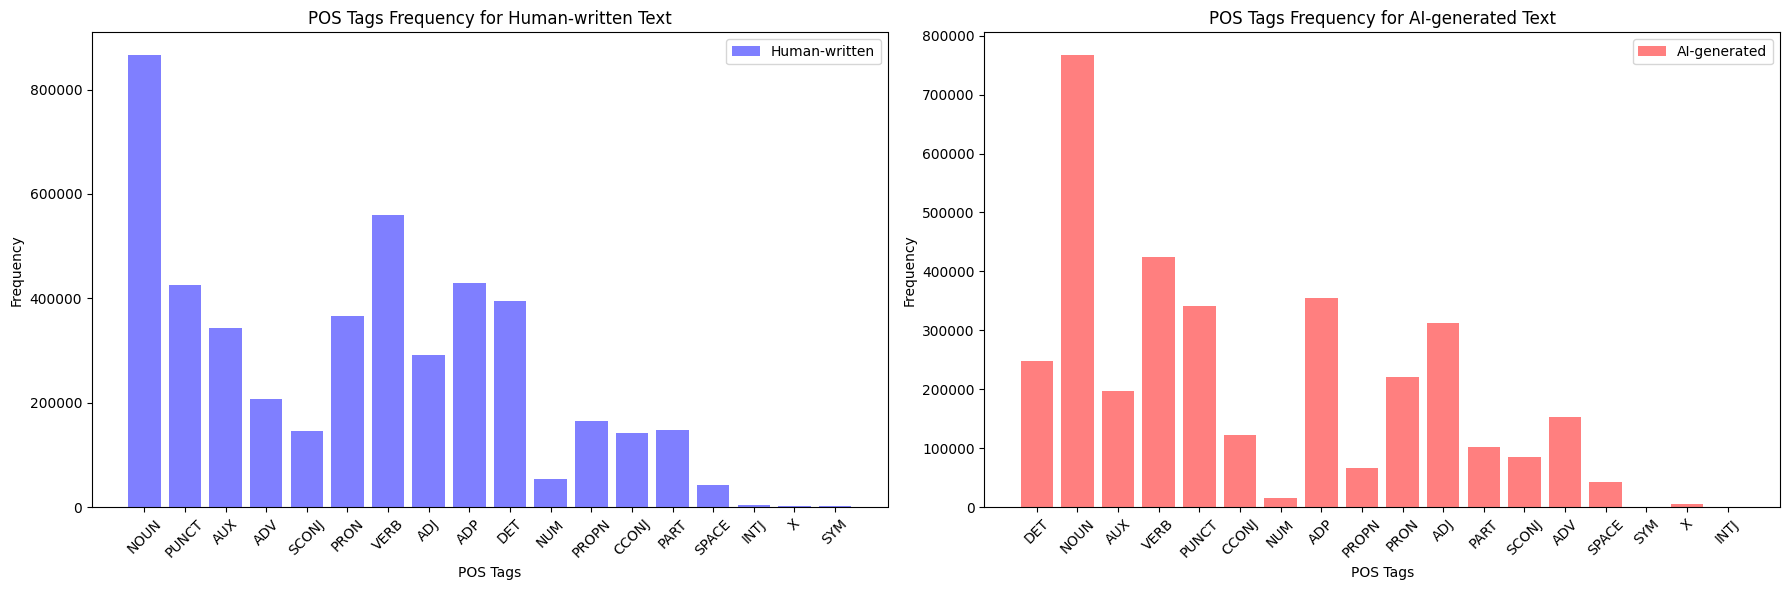

In [13]:
import matplotlib.pyplot as plt

# Extracting POS tags for human-written and AI-generated texts
human_txt_pos_tags = df_2[df_2['generated'] == 0]['pos_tags']
ai_txt_pos_tags = df_2[df_2['generated'] == 1]['pos_tags']


# Function to calculate frequency of POS tags
def calculate_pos_tag_frequency(pos_tags):
    pos_counts = {}
    for tags in pos_tags:
        for _, pos_tag in tags:
            pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    return pos_counts

# Calculate frequency of POS tags for human-written and AI-generated texts
human_pos_tag_frequency = calculate_pos_tag_frequency(human_txt_pos_tags)
ai_pos_tag_frequency = calculate_pos_tag_frequency(ai_txt_pos_tags)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_pos_tag_frequency.keys(), human_pos_tag_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('POS Tags')
ax1.set_ylabel('Frequency')
ax1.set_title('POS Tags Frequency for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_pos_tag_frequency.keys(), ai_pos_tag_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('POS Tags')
ax2.set_ylabel('Frequency')
ax2.set_title('POS Tags Frequency for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




In [14]:
human_pos_tag_frequency


{'NOUN': 866243,
 'PUNCT': 425107,
 'AUX': 342815,
 'ADV': 206498,
 'SCONJ': 146150,
 'PRON': 366845,
 'VERB': 559709,
 'ADJ': 291672,
 'ADP': 428478,
 'DET': 395812,
 'NUM': 53451,
 'PROPN': 165740,
 'CCONJ': 141257,
 'PART': 147840,
 'SPACE': 41667,
 'INTJ': 3606,
 'X': 2022,
 'SYM': 2858}

In [15]:
ai_pos_tag_frequency

{'DET': 248349,
 'NOUN': 767309,
 'AUX': 196819,
 'VERB': 423632,
 'PUNCT': 342106,
 'CCONJ': 121589,
 'NUM': 16224,
 'ADP': 354780,
 'PROPN': 66923,
 'PRON': 220898,
 'ADJ': 313045,
 'PART': 102391,
 'SCONJ': 85858,
 'ADV': 152453,
 'SPACE': 41930,
 'SYM': 933,
 'X': 5006,
 'INTJ': 791}

there is a considerable difference in both for POS tag, so will do for the whole dataset

In [16]:
# 2. Named Entity Recognition (NER)
def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_2['named_entities'] = df_2['text'].apply(named_entity_recognition)

In [17]:
df_2

,text,generated,pos_tags,named_entities
0,Cars. Cars have been around since they became ...,0.0,"[(Cars, NOUN), (., PUNCT), (Cars, NOUN), (have...","[(the 1900s, DATE), (Henry Ford, PERSON), (fir..."
1,Transportation is a large necessity in most co...,0.0,"[(Transportation, NOUN), (is, AUX), (a, DET), ...","[(Transportation, ORG), (daily, DATE), (Earth,..."
2,"""America's love affair with it's vehicles seem...",0.0,"[("", PUNCT), (America, PROPN), ('s, PART), (lo...","[(America, GPE), (Elisabeth, PERSON), (America..."
3,How often do you ride in a car? Do you drive a...,0.0,"[(How, SCONJ), (often, ADV), (do, AUX), (you, ...","[(one, CARDINAL), (today, DATE), (cuban, NORP)..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,"[(Cars, NOUN), (are, AUX), (a, DET), (wonderfu...","[(one, CARDINAL), (minutes, TIME), (I4, LOC), ..."
...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,"[(The, DET), (use, NOUN), (of, ADP), (renewabl...","[(two, CARDINAL), (recent years, DATE)]"
19996,High school sports are often a source of pride...,1.0,"[(High, ADJ), (school, NOUN), (sports, NOUN), ...","[(the United States, GPE)]"
19997,The beauty of nature can be seen in the cycle ...,1.0,"[(The, DET), (beauty, NOUN), (of, ADP), (natur...","[(season, DATE), (winter, DATE), (Spring, DATE..."
19998,The impact of air pollution on human health is...,1.0,"[(The, DET), (impact, NOUN), (of, ADP), (air, ...","[(hours, TIME), (HEPA, ORG), (every day, DATE)]"


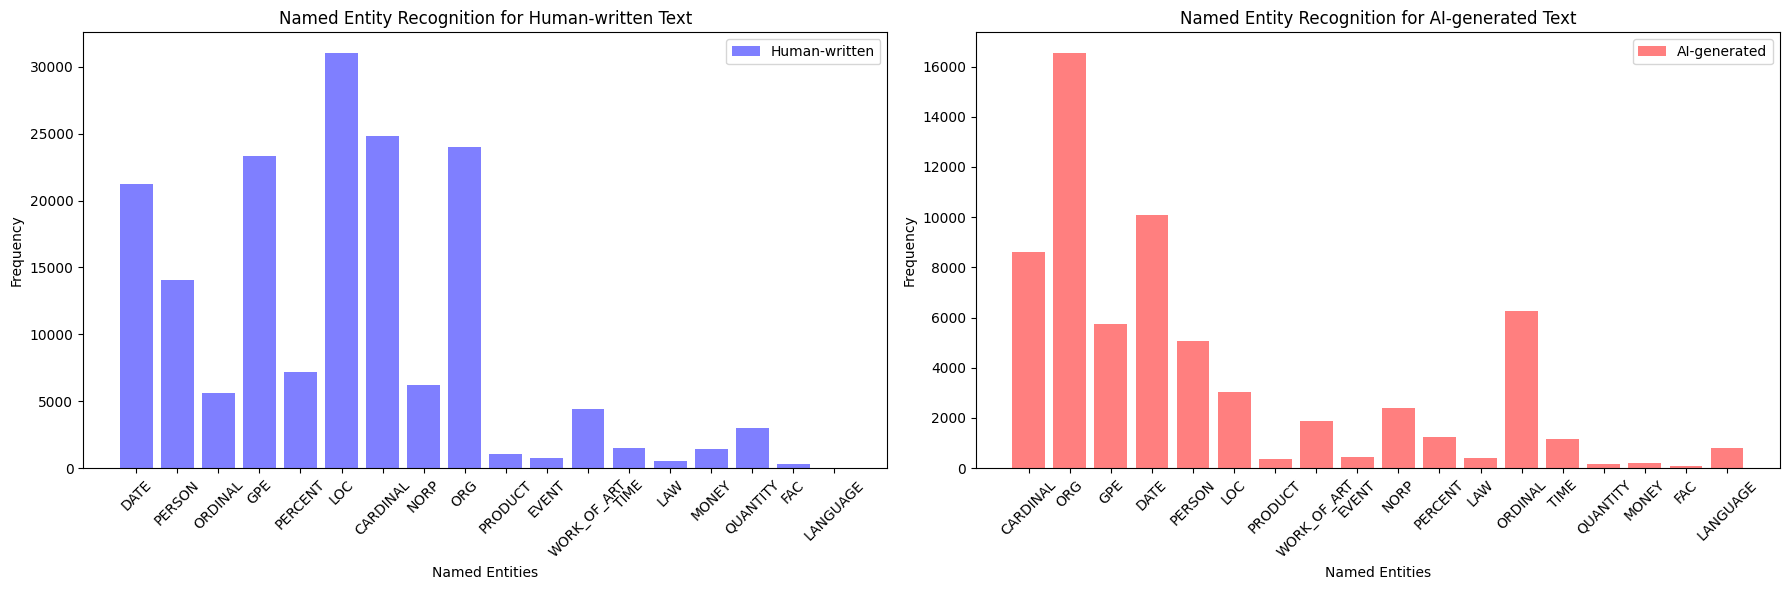

In [18]:
import matplotlib.pyplot as plt

# Extracting named entities for human-written and AI-generated texts
human_txt_named_entities = df_2[df_2['generated'] == 0]['named_entities']
ai_txt_named_entities = df_2[df_2['generated'] == 1]['named_entities']

# Function to calculate frequency of named entities
def calculate_named_entity_frequency(named_entities):
    entity_counts = {}
    for entities in named_entities:
        for _, entity in entities:
            entity_counts[entity] = entity_counts.get(entity, 0) + 1
    return entity_counts

# Calculate frequency of named entities for human-written and AI-generated texts
human_named_entity_frequency = calculate_named_entity_frequency(human_txt_named_entities)
ai_named_entity_frequency = calculate_named_entity_frequency(ai_txt_named_entities)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_named_entity_frequency.keys(), human_named_entity_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('Named Entities')
ax1.set_ylabel('Frequency')
ax1.set_title('Named Entity Recognition for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_named_entity_frequency.keys(), ai_named_entity_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('Named Entities')
ax2.set_ylabel('Frequency')
ax2.set_title('Named Entity Recognition for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [20]:
human_named_entity_frequency

{'DATE': 21235,
 'PERSON': 14066,
 'ORDINAL': 5640,
 'GPE': 23299,
 'PERCENT': 7224,
 'LOC': 31020,
 'CARDINAL': 24843,
 'NORP': 6249,
 'ORG': 24005,
 'PRODUCT': 1026,
 'EVENT': 759,
 'WORK_OF_ART': 4459,
 'TIME': 1475,
 'LAW': 506,
 'MONEY': 1464,
 'QUANTITY': 2996,
 'FAC': 280,
 'LANGUAGE': 29}

In [21]:
ai_named_entity_frequency

{'CARDINAL': 8607,
 'ORG': 16538,
 'GPE': 5763,
 'DATE': 10099,
 'PERSON': 5056,
 'LOC': 3033,
 'PRODUCT': 370,
 'WORK_OF_ART': 1874,
 'EVENT': 429,
 'NORP': 2410,
 'PERCENT': 1238,
 'LAW': 422,
 'ORDINAL': 6251,
 'TIME': 1144,
 'QUANTITY': 185,
 'MONEY': 216,
 'FAC': 102,
 'LANGUAGE': 787}

In [22]:
# 3. Parser (Dependency Parsing)
def dependency_parsing(text):
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children]) for token in doc]

df_2['dependency_parsing'] = df_2['text'].apply(dependency_parsing)

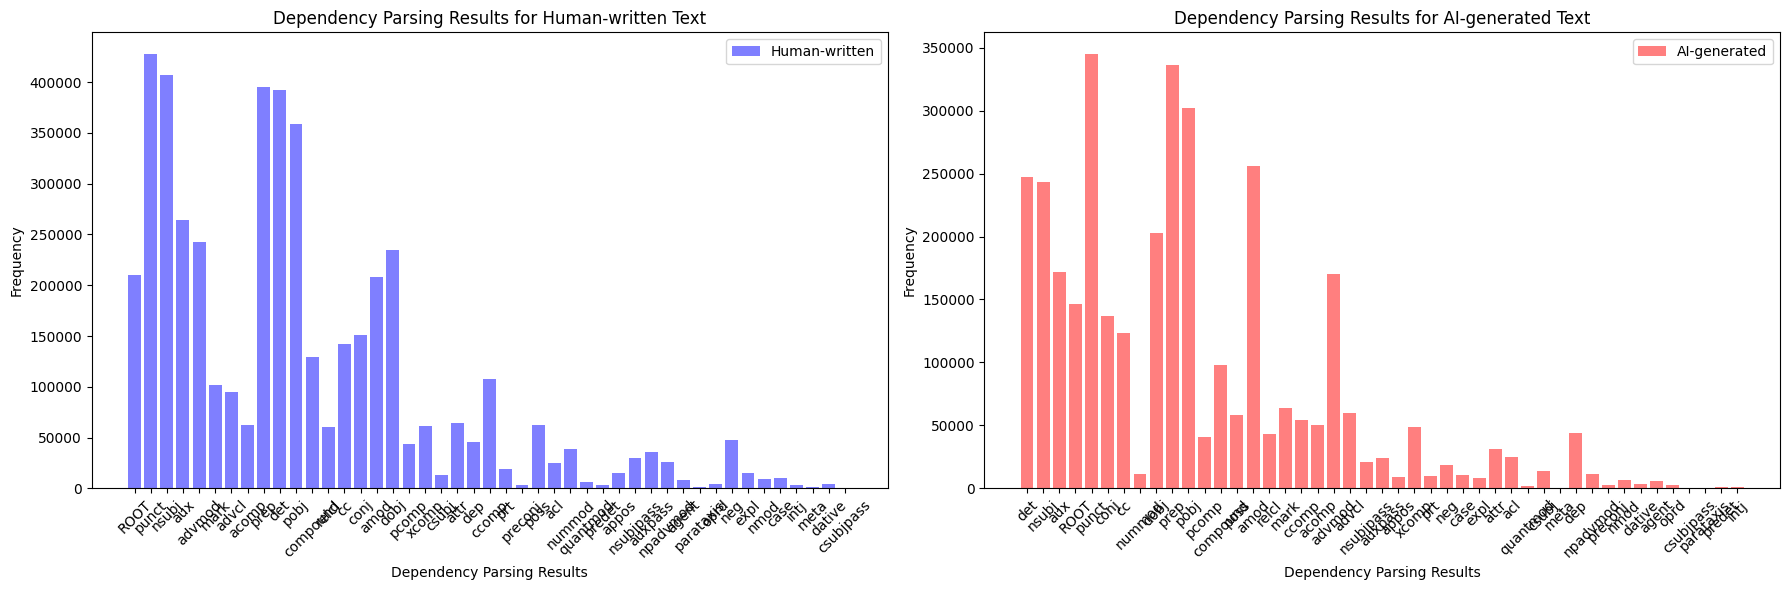

In [23]:
import matplotlib.pyplot as plt

# Extracting dependency parsing results for human-written and AI-generated texts
human_txt_dependency_parsing = df_2[df_2['generated'] == 0]['dependency_parsing']
ai_txt_dependency_parsing = df_2[df_2['generated'] == 1]['dependency_parsing']

# Function to calculate frequency of dependency parsing results
def calculate_dependency_parsing_frequency(dependency_parsing):
    parsing_counts = {}
    for parse in dependency_parsing:
        for _, dep, _, _, _ in parse:
            parsing_counts[dep] = parsing_counts.get(dep, 0) + 1
    return parsing_counts

# Calculate frequency of dependency parsing results for human-written and AI-generated texts
human_dependency_parsing_frequency = calculate_dependency_parsing_frequency(human_txt_dependency_parsing)
ai_dependency_parsing_frequency = calculate_dependency_parsing_frequency(ai_txt_dependency_parsing)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_dependency_parsing_frequency.keys(), human_dependency_parsing_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('Dependency Parsing Results')
ax1.set_ylabel('Frequency')
ax1.set_title('Dependency Parsing Results for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_dependency_parsing_frequency.keys(), ai_dependency_parsing_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('Dependency Parsing Results')
ax2.set_ylabel('Frequency')
ax2.set_title('Dependency Parsing Results for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [24]:
human_dependency_parsing_frequency

{'ROOT': 210271,
 'punct': 427689,
 'nsubj': 407105,
 'aux': 263894,
 'advmod': 243025,
 'mark': 101392,
 'advcl': 95329,
 'acomp': 61915,
 'prep': 395172,
 'det': 391935,
 'pobj': 358680,
 'compound': 129557,
 'relcl': 60050,
 'cc': 141898,
 'conj': 151481,
 'amod': 208378,
 'dobj': 234271,
 'pcomp': 44100,
 'xcomp': 61229,
 'csubj': 12934,
 'attr': 64056,
 'dep': 45247,
 'ccomp': 107391,
 'prt': 19504,
 'preconj': 3196,
 'poss': 62711,
 'acl': 25370,
 'nummod': 38670,
 'quantmod': 6456,
 'predet': 3757,
 'appos': 14981,
 'nsubjpass': 30054,
 'auxpass': 36088,
 'npadvmod': 25745,
 'agent': 7885,
 'parataxis': 1186,
 'oprd': 4568,
 'neg': 47469,
 'expl': 15206,
 'nmod': 8983,
 'case': 10333,
 'intj': 3162,
 'meta': 1053,
 'dative': 4161,
 'csubjpass': 233}

In [25]:
ai_dependency_parsing_frequency

{'det': 247190,
 'nsubj': 243220,
 'aux': 172056,
 'ROOT': 146396,
 'punct': 344954,
 'conj': 136964,
 'cc': 123062,
 'nummod': 10988,
 'dobj': 203076,
 'prep': 336358,
 'pobj': 302128,
 'pcomp': 40615,
 'compound': 97661,
 'poss': 58263,
 'amod': 256227,
 'relcl': 42933,
 'mark': 63601,
 'ccomp': 54484,
 'acomp': 50121,
 'advmod': 170037,
 'advcl': 59883,
 'nsubjpass': 20541,
 'auxpass': 23757,
 'appos': 9101,
 'xcomp': 48339,
 'prt': 9798,
 'neg': 18318,
 'case': 10950,
 'expl': 8245,
 'attr': 31257,
 'acl': 25020,
 'quantmod': 1936,
 'csubj': 13686,
 'meta': 415,
 'dep': 44266,
 'npadvmod': 11042,
 'preconj': 2956,
 'nmod': 6783,
 'dative': 3606,
 'agent': 6017,
 'oprd': 2477,
 'csubjpass': 170,
 'parataxis': 218,
 'predet': 1195,
 'intj': 726}

In [26]:
# 4. Email Detection (EDM)
def email_detection(text):
    email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    return re.findall(email_regex, text)

df_2['emails'] = df_2['text'].apply(email_detection)



In [30]:

import re

def email_detection(text):
    email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    return re.findall(email_regex, text, re.IGNORECASE)

df_2['emails'] = df_2['text'].apply(email_detection)

In [31]:
df_2

,text,generated,pos_tags,named_entities,dependency_parsing,emails,slangs
0,Cars. Cars have been around since they became ...,0.0,"[(Cars, NOUN), (., PUNCT), (Cars, NOUN), (have...","[(the 1900s, DATE), (Henry Ford, PERSON), (fir...","[(Cars, ROOT, Cars, NOUN, [.]), (., punct, Car...",[],[]
1,Transportation is a large necessity in most co...,0.0,"[(Transportation, NOUN), (is, AUX), (a, DET), ...","[(Transportation, ORG), (daily, DATE), (Earth,...","[(Transportation, nsubj, is, AUX, []), (is, RO...",[],[]
2,"""America's love affair with it's vehicles seem...",0.0,"[("", PUNCT), (America, PROPN), ('s, PART), (lo...","[(America, GPE), (Elisabeth, PERSON), (America...","[("", punct, says, VERB, []), (America, poss, a...",[],[]
3,How often do you ride in a car? Do you drive a...,0.0,"[(How, SCONJ), (often, ADV), (do, AUX), (you, ...","[(one, CARDINAL), (today, DATE), (cuban, NORP)...","[(How, advmod, often, ADV, []), (often, advmod...",[],[]
4,Cars are a wonderful thing. They are perhaps o...,0.0,"[(Cars, NOUN), (are, AUX), (a, DET), (wonderfu...","[(one, CARDINAL), (minutes, TIME), (I4, LOC), ...","[(Cars, nsubj, are, AUX, []), (are, ROOT, are,...",[],[]
...,...,...,...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,"[(The, DET), (use, NOUN), (of, ADP), (renewabl...","[(two, CARDINAL), (recent years, DATE)]","[(The, det, use, NOUN, []), (use, nsubj, is, A...",[],[]
19996,High school sports are often a source of pride...,1.0,"[(High, ADJ), (school, NOUN), (sports, NOUN), ...","[(the United States, GPE)]","[(High, amod, school, NOUN, []), (school, comp...",[],[]
19997,The beauty of nature can be seen in the cycle ...,1.0,"[(The, DET), (beauty, NOUN), (of, ADP), (natur...","[(season, DATE), (winter, DATE), (Spring, DATE...","[(The, det, beauty, NOUN, []), (beauty, nsubjp...",[],[]
19998,The impact of air pollution on human health is...,1.0,"[(The, DET), (impact, NOUN), (of, ADP), (air, ...","[(hours, TIME), (HEPA, ORG), (every day, DATE)]","[(The, det, impact, NOUN, []), (impact, nsubj,...",[],[]


In [32]:
# Extracting emails for human-written and AI-generated texts
human_txt_emails = df_2[df_2['generated'] == 0]['emails']
ai_txt_emails = df_2[df_2['generated'] == 1]['emails']

# Function to calculate the number of emails
def count_emails(emails):
    email_count = 0
    for email_list in emails:
        email_count += len(email_list)
    return email_count

# Calculate the number of emails for human-written and AI-generated texts
human_email_count = count_emails(human_txt_emails)
ai_email_count = count_emails(ai_txt_emails)

# Print the number of emails for each category
print("Number of emails detected in human-written texts:", human_email_count)
print("Number of emails detected in AI-generated texts:", ai_email_count)



Number of emails detected in human-written texts: 0
Number of emails detected in AI-generated texts: 0


In [29]:
# 5. Slangs Detection
def slangs_detection(text):
    slang_regex = r'\b(?:lol|brb|omg)\b'
    return re.findall(slang_regex, text, flags=re.IGNORECASE)

df_2['slangs'] = df_2['text'].apply(slangs_detection)



In [33]:
# Extracting slangs for human-written and AI-generated texts
human_txt_slangs = df_2[df_2['generated'] == 0]['slangs']
ai_txt_slangs = df_2[df_2['generated'] == 1]['slangs']

# Function to count the number of slangs
def count_slangs(slangs):
    slang_count = 0
    for slang_list in slangs:
        slang_count += len(slang_list)
    return slang_count

# Calculate the number of slangs for human-written and AI-generated texts
human_slang_count = count_slangs(human_txt_slangs)
ai_slang_count = count_slangs(ai_txt_slangs)

# Print the number of slangs for each category
print("Number of slangs detected in human-written texts:", human_slang_count)
print("Number of slangs detected in AI-generated texts:", ai_slang_count)


Number of slangs detected in human-written texts: 6
Number of slangs detected in AI-generated texts: 4


In [39]:
# 6. Abbreviations Detection
def abbreviations_detection(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

df_2['abbreviations'] = df_2['text'].apply(abbreviations_detection)

In [40]:
# Extracting abbreviations for human-written and AI-generated texts
human_txt_abbreviations = df_2[df_2['generated'] == 0]['abbreviations']
ai_txt_abbreviations = df_2[df_2['generated'] == 1]['abbreviations']

# Function to count the number of abbreviations
def count_abbreviations(abbreviations):
    abbreviation_count = 0
    for abbreviation_list in abbreviations:
        abbreviation_count += len(abbreviation_list)
    return abbreviation_count

# Calculate the number of abbreviations for human-written and AI-generated texts
human_abbreviation_count = count_abbreviations(human_txt_abbreviations)
ai_abbreviation_count = count_abbreviations(ai_txt_abbreviations)

# Print the number of abbreviations for each category
print("Number of abbreviations detected in human-written texts:", human_abbreviation_count)
print("Number of abbreviations detected in AI-generated texts:", ai_abbreviation_count)


Number of abbreviations detected in human-written texts: 24005
Number of abbreviations detected in AI-generated texts: 16538
